In [1]:
import pandas as pd
import numpy as np
import requests
from gspread_pandas import Spread, Client
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

In [2]:
dates = [20200116,
20200123,
20200125,
20200201,
20200208,
20200213,
20200215,
20200220,
20200222,
20200227,
20200319,
20200326,
20200402,
20200416]

attendance = {}
proj_meetings = {}
worksessions = {}
df = pd.DataFrame()

In [3]:
len(dates)

14

In [4]:
for date in dates:
    spread = Spread('Attendance ' + str(date) + ' (Responses)')
    temp = spread.sheet_to_df(sheet='Form Responses 1')
    temp['date'] = date
    frames = [df,temp]
    df = pd.concat(frames)
    attendance[pd.to_datetime(str(date), format='%Y%m%d', errors='ignore')] = len(temp)
    if pd.to_datetime(str(date), format = '%Y%m%d', errors='ignore').weekday() == 3:
        proj_meetings[pd.to_datetime(str(date), format='%Y%m%d', errors='ignore')] = len(temp)
    if pd.to_datetime(str(date), format = '%Y%m%d', errors='ignore').weekday() == 5:
        worksessions[pd.to_datetime(str(date), format='%Y%m%d', errors='ignore')] = len(temp)

In [5]:
attendance
proj_meetings
worksessions

{Timestamp('2020-01-25 00:00:00'): 39,
 Timestamp('2020-02-01 00:00:00'): 46,
 Timestamp('2020-02-08 00:00:00'): 38,
 Timestamp('2020-02-15 00:00:00'): 40,
 Timestamp('2020-02-22 00:00:00'): 36}

In [6]:
attend_sr = pd.Series(attendance)

In [7]:
proj_sr = pd.Series(proj_meetings)

In [8]:
work_sr = pd.Series(worksessions)

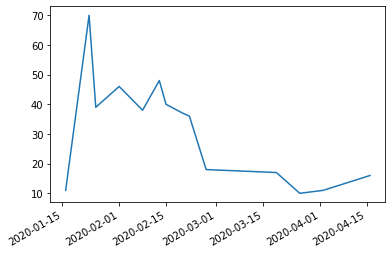

In [9]:
attend_sr.plot()

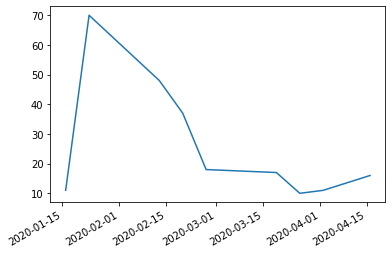

In [10]:
proj_sr.plot()

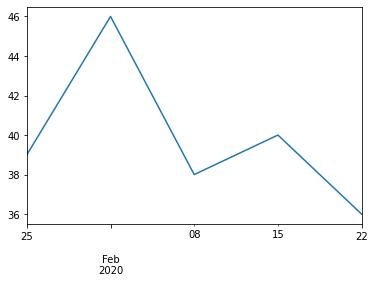

In [11]:
work_sr.plot()

In [12]:
df['early'] = None

In [13]:
df = df.reset_index()

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x)

In [15]:
df

,Timestamp,Email Address,First Name,Last Name,How much wood could a woodchuck chuck if a woodchuck could chuck wood?,date,"How would you abbreviate ""as per usual""? (i.e. how do you spell ju:ʒ)",Vibe Check!,Olives on pizza?,What do you think of your technical improvement during this session?,...,First (free!!) social event next Saturday! What would you like to do?,Is a doll a stuffed animal?,Read any good books recently?,"If you're attending the social event, please sign this online waiver.","If you were a type of jeans, what type would you be?",Best teleconferencing solution,Data is to Datum as _____.,"If you could be stranded on an island with anyone in MDST, which island would you want to be stranded on?","Pick the smallest prime number you can, but if someone else picks the same number, your choice will be invalidated.",early
0,2020-01-16 17:46:40,naitian@umich.edu,Naitian,Zhou,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2020-01-16 17:46:45,aashisht@umich.edu,Aashish,Tripathee,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2020-01-16 17:47:42,justrite@umich.edu,Justin,Ritenburgh,3,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2020-01-16 17:49:42,ericch@umich.edu,Eric,Chen,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2020-01-16 17:55:55,lijane@umich.edu,Jane,Li,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2020-04-16 18:01:21,tejaskul@umich.edu,Tejas,Kulkarni,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
433,2020-04-16 18:02:11,reneeli@umich.edu,Renee,Li,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
434,2020-04-16 18:02:43,derryiri@umich.edu,Iris,Derry,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None
435,2020-04-16 18:03:12,burteth@umich.edu,Ethan,Burt,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None


In [16]:
thurs_df = df.loc[df['Timestamp'].dt.weekday == 3 ]

In [17]:
thurs_df

,Timestamp,Email Address,First Name,Last Name,How much wood could a woodchuck chuck if a woodchuck could chuck wood?,date,"How would you abbreviate ""as per usual""? (i.e. how do you spell ju:ʒ)",Vibe Check!,Olives on pizza?,What do you think of your technical improvement during this session?,...,First (free!!) social event next Saturday! What would you like to do?,Is a doll a stuffed animal?,Read any good books recently?,"If you're attending the social event, please sign this online waiver.","If you were a type of jeans, what type would you be?",Best teleconferencing solution,Data is to Datum as _____.,"If you could be stranded on an island with anyone in MDST, which island would you want to be stranded on?","Pick the smallest prime number you can, but if someone else picks the same number, your choice will be invalidated.",early
0,2020-01-16 17:46:40,naitian@umich.edu,Naitian,Zhou,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2020-01-16 17:46:45,aashisht@umich.edu,Aashish,Tripathee,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2020-01-16 17:47:42,justrite@umich.edu,Justin,Ritenburgh,3,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2020-01-16 17:49:42,ericch@umich.edu,Eric,Chen,4,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2020-01-16 17:55:55,lijane@umich.edu,Jane,Li,5,20200116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2020-04-16 18:01:21,tejaskul@umich.edu,Tejas,Kulkarni,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
433,2020-04-16 18:02:11,reneeli@umich.edu,Renee,Li,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,None
434,2020-04-16 18:02:43,derryiri@umich.edu,Iris,Derry,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None
435,2020-04-16 18:03:12,burteth@umich.edu,Ethan,Burt,NaN,20200416,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,None


In [27]:
for index, row in thurs_df.iterrows():
    if row[0].time() < datetime.datetime(2000,5,15,17).time():
        thurs_df.loc[index,'early'] = 1
    else:
        thurs_df.loc[index,'early'] = 0


/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
late_sr = thurs_df[thurs_df['early'] != 1].groupby(['date']).size()

In [36]:
total_sr = thurs_df.groupby(['date']).size()

In [38]:
early_sr = total_sr - late_sr

In [39]:
early_sr

date
20200116     0
20200123    11
20200213    30
20200220     8
20200227     7
20200319     7
20200326     4
20200402     0
20200416     7
dtype: int64

In [40]:
model = sm.OLS(early_sr, total_sr)

In [41]:
res = model.fit()

In [42]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              18.22
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                     0.00273
Time:                        13:41:27   Log-Likelihood:                         -29.624
No. Observations:                   9   AIC:                                      61.25
Df Residuals:                       8   BIC:                                      61.44
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/coding/Documents/MDST/attendance-analysis/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
